# Movie Recommendation System Notebook 🍿🎬

## Purpose: Recommend movies based on user-preferred genres using cosine similarity

#### Import Libraries 

In [1]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset & Review it

In [2]:
movies = pd.read_csv('movies.csv')
movies.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [3]:
movies.shape

(4803, 24)

#### Select relevant features for recommendation

In [4]:
movies = movies[['title', 'genres', 'vote_average', 'vote_count']]
print("Selected features: ")
movies.head()

Selected features: 


,title,genres,vote_average,vote_count
0,Avatar,Action Adventure Fantasy Science Fiction,7.2,11800
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,6.9,4500
2,Spectre,Action Adventure Crime,6.3,4466
3,The Dark Knight Rises,Action Crime Drama Thriller,7.6,9106
4,John Carter,Action Adventure Science Fiction,6.1,2124


#### Checking for null values & Handle them

In [5]:
print("Checking for missing values: ")
movies.isnull().sum()

Checking for missing values: 


title            0
genres          28
vote_average     0
vote_count       0
dtype: int64

We can notice genres attribute contain 28 null values so WE MUST handle them 

In [6]:
movies['genres'] = movies['genres'].fillna('')  # fill missing genres with empty string

Now we check again if there is still any missing values

In [7]:
movies['genres'].isnull().sum() 

0

#### Converting Categroical values to Numerical values

based on our selected features, 'genres' is the only attribute that contain categorical values so we need to convert them

In [8]:
# Convert values from string to list
movies['genres_list'] = movies['genres'].apply(lambda x: x.split())

In [9]:
# Convert genres into numerical columns USING One-Hot encode genres
multLb = MultiLabelBinarizer()
genre_matrix = multLb.fit_transform(movies['genres_list'])

genre_df = pd.DataFrame(
    genre_matrix,
    columns=multLb.classes_
)

#### Taking user input for perferred genres of a movie

In [10]:
user_input = input("Enter genre of a movie: (separated space for multiple genres ")
user_genres = user_input.split()

Enter genre of a movie: (separated space for multiple genres  Action Comedy


#### Create a user preference vector

In [11]:
user_vector = pd.Series(0, index=genre_df.columns)
for genre in user_genres:
    if genre in user_vector.index:
        user_vector[genre] = 1

#### Compute similarity between user preference and movies

In [12]:
similarity_scores = cosine_similarity([user_vector], genre_df ).flatten()
movies['similarity'] = similarity_scores

#### Recommend movies 

In [13]:
recommended_movies = movies.sort_values(by=['similarity', 'vote_average'], ascending=False)
print(" Recommended Movies:")
print(recommended_movies[['title', 'genres', 'vote_average']].head())

 Recommended Movies:
                             title         genres  vote_average
4078  The Legend of Drunken Master  Action Comedy           7.2
4546                   Crazy Stone  Action Comedy           6.9
1783             Pineapple Express  Action Comedy           6.6
3099                Shaolin Soccer  Action Comedy           6.6
353                 Tropic Thunder  Action Comedy           6.5


#### Visualization of Movie Recommendations

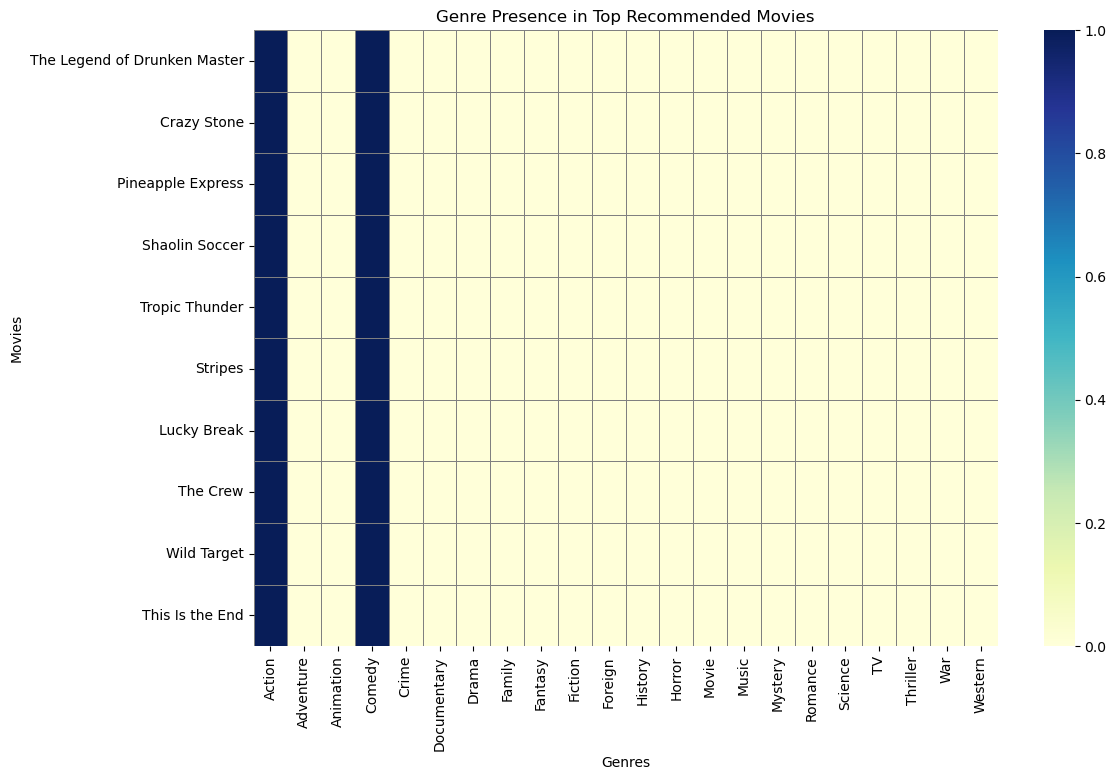

In [14]:
top_movies = recommended_movies.head(10)
# Create genre matrix for top movies
top_genre_matrix = multLb.transform(top_movies['genres_list'])
top_genre_df = pd.DataFrame(top_genre_matrix, columns=multLb.classes_, index=top_movies['title'])

plt.figure(figsize=(12,8))
sns.heatmap(top_genre_df, cmap="YlGnBu", cbar=True, linewidths=0.5, linecolor='gray')
plt.title("Genre Presence in Top Recommended Movies")
plt.xlabel("Genres")
plt.ylabel("Movies")
plt.show()